In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [2]:
# Load the data from a CSV file
df = pd.read_csv("/Users/Strangers123/Downloads/TSLA.csv")
#Convert Date object to DateTime then floating number (UNIX)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df[('Date')].values.astype("float64")

# Split the data into feature (closing price) and target (Date)
X = pd.DataFrame(df['Date'])
y = pd.DataFrame(df['Close'])

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1.277770e+18,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1.277856e+18,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,1.277942e+18,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,1.278029e+18,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,1.278374e+18,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3348,1.697501e+18,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
3349,1.697587e+18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
3350,1.697674e+18,225.949997,230.610001,216.779999,220.110001,220.110001,170772700
3351,1.697760e+18,217.009995,218.860001,210.419998,211.990005,211.990005,137734000


In [4]:
#Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [5]:
lin = LinearRegression()
lin.fit(X,y)

LinearRegression()

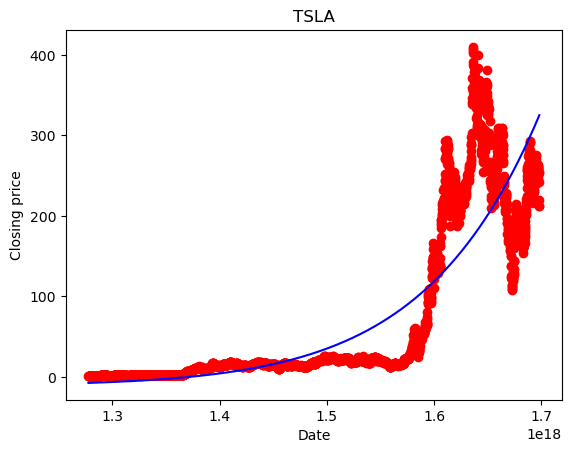

In [6]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=16)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('TSLA')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1.277770e+18,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1.277856e+18,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,1.277942e+18,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,1.278029e+18,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,1.278374e+18,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3348,1.697501e+18,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
3349,1.697587e+18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
3350,1.697674e+18,225.949997,230.610001,216.779999,220.110001,220.110001,170772700
3351,1.697760e+18,217.009995,218.860001,210.419998,211.990005,211.990005,137734000


In [8]:
# Predicting a new result with Polymonial Regression. Use unix nanoseconds
# Converter
# https://www.unixtimestamp.com/
#If you wanted to predict the price of the TSLA stock's closing on Christmas eve this year:
pol_reg.predict(poly_reg.fit_transform([[1703458800000000000]]))

array([[342.79707531]])